# Data prep

In [3]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [85]:
shp = gpd.read_file(os.path.expanduser("~/iec1/gis/pc11/pc11-district.shp"))
shp['geometry'] = shp['geometry'].to_crs(epsg=4326)

In [86]:
shp.rename(columns={"pc11_s_id":"pc11_state_id"}, inplace = True)
shp.rename(columns={"pc11_d_id":"pc11_district_id"}, inplace = True)

In [87]:
df = pd.read_stata(os.path.expanduser("~/iec/covid/migration/pc11/district_migration_pc11.dta"))

In [88]:
shpdata = shp.merge(df, on='pc11_district_id')

# Naive plots

In [8]:
plt.rcParams['figure.figsize'] = (15,15)

Text(0.5, 1.0, 'outstmigrationrate')

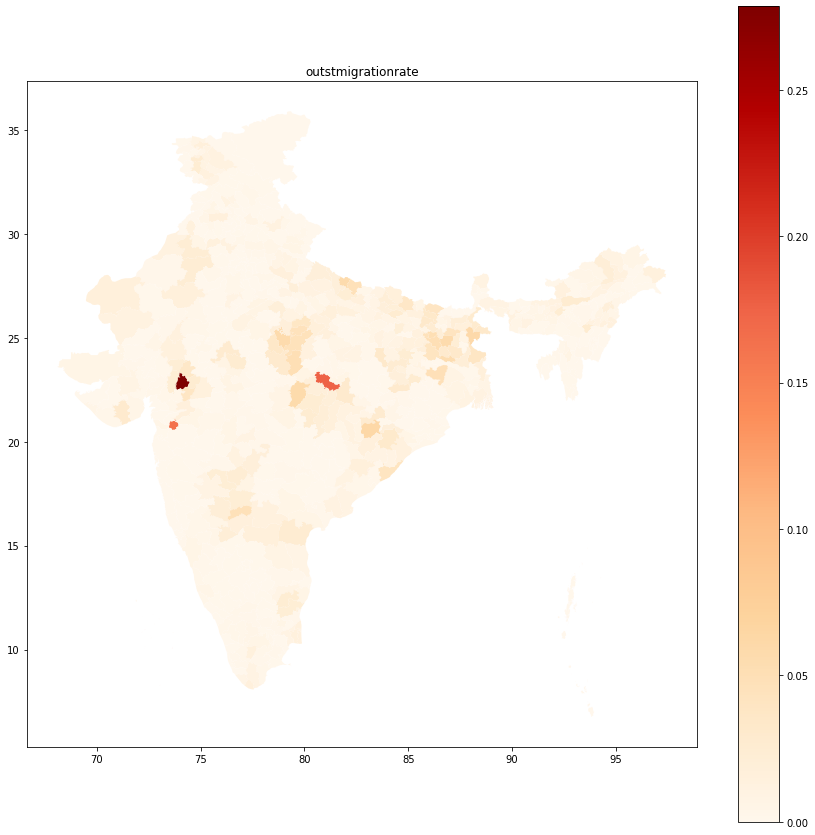

In [51]:
shpdata.plot(column='outstmigrationrate', cmap='OrRd', legend=True).set_title('outstmigrationrate')

Text(0.5, 1.0, 'inltmigrationshare')

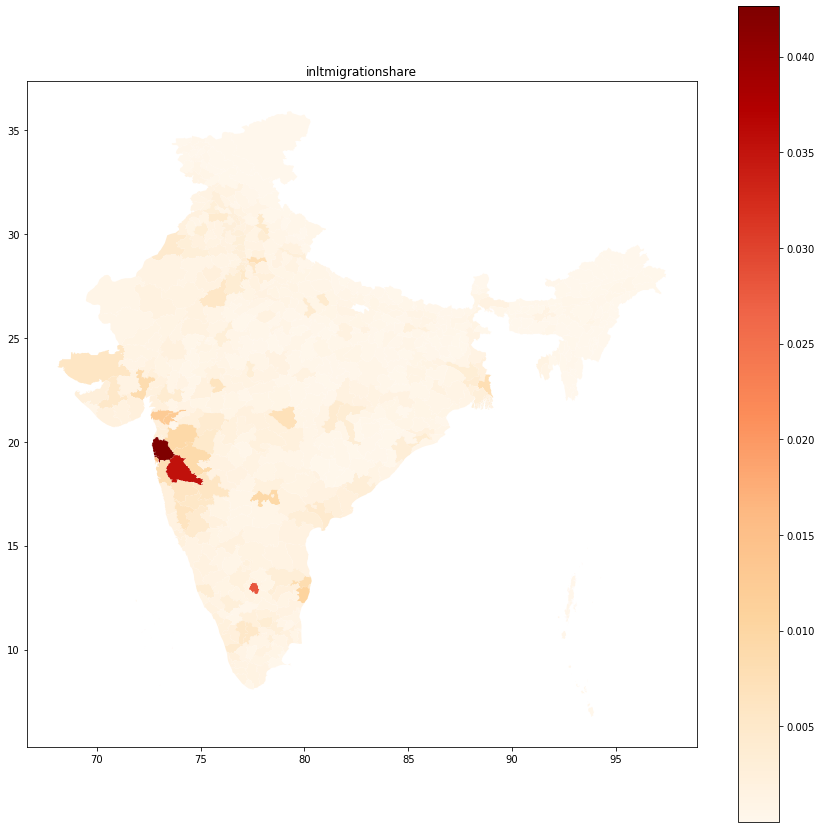

In [54]:
shpdata.plot(column='inltmigrationshare', cmap='OrRd', legend=True).set_title('inltmigrationshare')

In [52]:
#shpdata.plot('inltmigrationshare', cmap='RdYlBu_r', legend=True)

# National-level variable plots
Transform the data to nonlinear scale for better visibility

In [174]:
def normalize_0_100(df, feature_name):
    result = df.copy()
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value) * 100
    return result

In [185]:
for feature_name in ['instmigrationshare', 'inltmigrationshare', 'outstmigrationshare', 'outltmigrationshare']:
    feature_name_ln = feature_name + '_ln'
    feature_name_qt = feature_name + '_qt'
    shpdata[feature_name_ln] = np.log(shpdata[feature_name] + 0.00000001)
    shpdata = normalize_0_100(shpdata, feature_name_ln)
    # gen new var with quantiles
    shpdata[feature_name_qt] = pd.qcut(shpdata[feature_name_ln], 5, labels=False)
    shpdata[feature_name_qt] = shpdata[feature_name_qt].fillna(0.0).astype(int) + 1
    shpdata[feature_name_qt] = 'Q' + shpdata[feature_name_qt].astype(str)

Text(0.5, 1.0, 'Temporary migration')

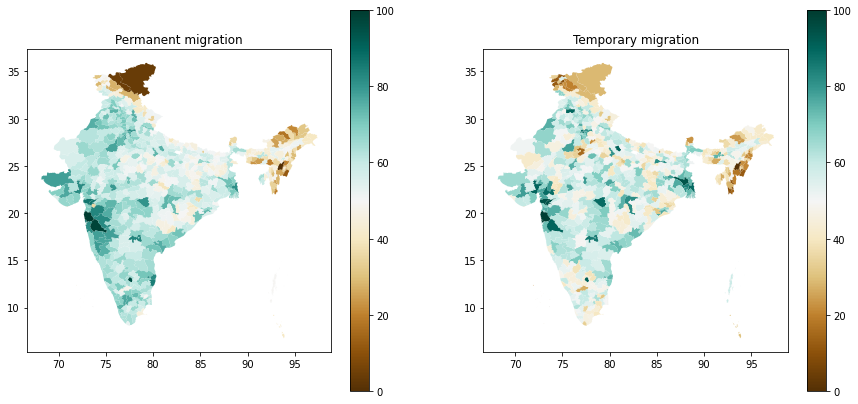

In [186]:
plt.rcParams['figure.figsize'] = (15,7)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
#fig.suptitle('Horizontally stacked subplots')
shpdata.plot(column='inltmigrationshare_ln', cmap='BrBG', legend=True, ax=ax1).set_title('Permanent migration')
shpdata.plot(column='instmigrationshare_ln', cmap='BrBG', legend=True, ax=ax2).set_title('Temporary migration')

## Map for twitter

Text(1, -0.1, 'Share of national migration totals within each district, log-transformed and indexed into five quantiles. Data source: Imbert, Ideas for India, 1 May 2020')

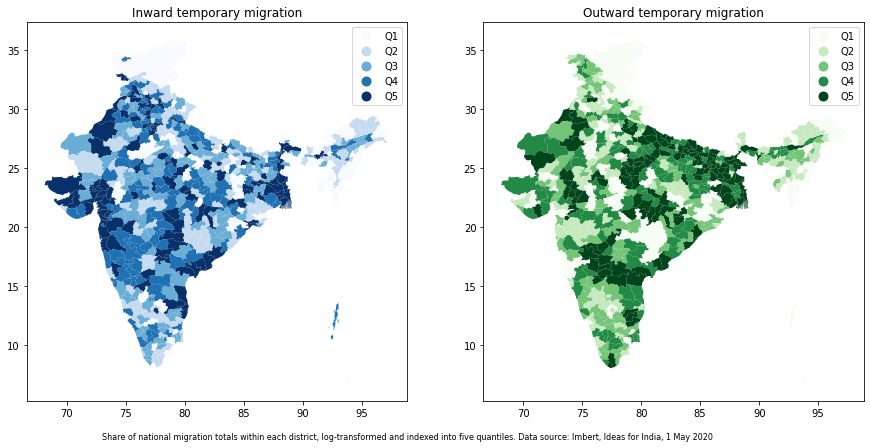

In [189]:
plt.rcParams['figure.figsize'] = (15,7)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
#fig.suptitle('Horizontally stacked subplots')
shpdata.plot(column='instmigrationshare_qt', categorical=True, cmap='Blues', legend=True, ax=ax1).set_title('Inward temporary migration')
shpdata.plot(column='outstmigrationshare_qt', categorical=True, cmap='Greens', legend=True, ax=ax2).set_title('Outward temporary migration')
#fig.subplots_adjust(top=0.95)
#plt.suptitle("Inward/Outward temporary migration", fontsize=14)
fig.text(1,-0.1, "Share of national migration totals within each district, log-transformed and indexed into five quantiles. Data source: Imbert, Ideas for India, 1 May 2020", size=8, ha="center", 
         transform=ax1.transAxes)

In [195]:
fig.savefig(tmp / 'migration_plot.png', dpi=400)

# Within-dist migration plots

In [150]:
# log transform and normalize to 1-100
for feature_name in ['instmigrationrate', 'inltmigrationrate', 'outstmigrationrate', 'outltmigrationrate']:
    feature_name_ln = feature_name + '_ln'
    feature_name_qt = feature_name + '_qt'
    shpdata[feature_name_ln] = np.log(shpdata[feature_name] + 0.00000001)
    shpdata = normalize_0_100(shpdata, feature_name_ln)
    # gen new var with quantiles
    shpdata[feature_name_qt] = pd.qcut(shpdata[feature_name_ln], 5, labels=False)
    shpdata[feature_name_qt] = shpdata[feature_name_qt].fillna(0.0).astype(int) + 1

In [151]:
shpdata["instmigrationrate_qt"]

0      4
1      3
2      3
3      4
4      4
      ..
635    5
636    5
637    4
638    3
639    5
Name: instmigrationrate_qt, Length: 640, dtype: int64

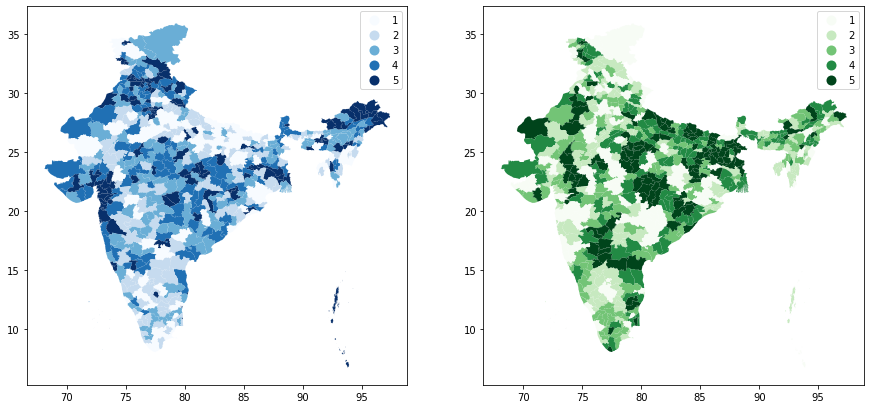

In [176]:
plt.rcParams['figure.figsize'] = (15,7)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
#fig.suptitle('Horizontally stacked subplots')
#shpdata.plot(column='instmigrationrate_ln', scheme='quantiles', cmap='Blues', legend=True, ax=ax1).set_title('Inward temporary migration (within-district rate)')
#shpdata.plot(column='outstmigrationrate_ln', scheme='QUANTILES', cmap='Greens', legend=True, ax=ax2).set_title('Outward temporary migration (within-district rate)')
shpdata.plot(column='instmigrationrate_qt', categorical=True, cmap='Blues', legend=True, ax=ax1)
shpdata.plot(column='outstmigrationrate_qt', categorical=True, cmap='Greens', legend=True, ax=ax2)